### Project 1: AI4D Africa’s Anglophone Research Lab Tanzania Tourism Classification Challenge

Load all data

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
!dir AI4D-Data\

 Volume in drive C is OS
 Volume Serial Number is 6219-F346

 Directory of C:\Users\Anna Carollo\AI4D-Data

07/13/2023  05:16 PM    <DIR>          .
07/17/2023  09:56 AM    <DIR>          ..
07/13/2023  05:16 PM           135,818 SampleSubmission.csv
07/13/2023  05:16 PM           979,230 Test.csv
07/13/2023  05:15 PM         3,147,987 Train.csv
07/13/2023  05:15 PM             1,251 VariableDefinitions.csv
               4 File(s)      4,264,286 bytes
               2 Dir(s)  317,850,607,616 bytes free


In [5]:
dfTrain = pd.read_csv("AI4D-Data/Train.csv")
dfTrain.shape
dfTrain.columns
dfTrain.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


In [24]:
dfTrain.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

In [6]:
dfTest = pd.read_csv("AI4D-Data/Test.csv")
dfTest.shape
dfTest.columns
dfTest.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,6167.000000,6168.000000,6169.00000,6169.000000
mean,0.922491,1.017510,9.31172,2.585832
std,1.173067,1.526274,16.36690,5.465058
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,3.00000,0.000000
50%,1.000000,1.000000,6.00000,0.000000
75%,1.000000,1.000000,11.00000,4.000000
max,30.000000,90.000000,664.00000,174.000000


In [29]:
dfTest.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
dtype: object

In [10]:
sample_submission = pd.read_csv("AI4D-Data/SampleSubmission.csv")
sample_submission.shape
sample_submission.columns
sample_submission.head()

,Tour_ID,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_idynufedne,0.23,0.56,0.04,0.12,0.005,0.12
1,tour_id9r3y5moe,NaN,NaN,NaN,NaN,NaN,NaN
2,tour_idf6itml6g,NaN,NaN,NaN,NaN,NaN,NaN
3,tour_id99u4znru,NaN,NaN,NaN,NaN,NaN,NaN
4,tour_idj4i9urbx,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
variable_definitions = pd.read_csv("AI4D-Data/VariableDefinitions.csv")
variable_definitions.head

<bound method NDFrame.head of               Column Name                                         Definition
0                      id                 Unique identifier for each tourist
1                 country                The country a tourist coming  from.
2               age_group                        The age group of a tourist.
3             travel_with  The relation of people a tourist travel with t...
4            total_female                            Total number of females
5              total_male                              Total number of males
6                 purpose                  The purpose of visiting  Tanzania
7           main_activity           The main activity of tourism in Tanzania
8            infor_source  The source of information about tourism in Tan...
9         tour_arrangment                The arrangment of visiting Tanzania
10  package_transport_int  If the tour package include international tran...
11   package_accomodation  If the tour package

The code below consists of data cleaning for the Train.csv data.

In [8]:
dfTrain['package_transport_tz'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
dfTrain['package_transport_tz'] = dfTrain['package_transport_tz'].replace('Yes',1)
dfTrain['package_transport_tz'] = dfTrain['package_transport_tz'].replace('No',0)

dfTrain['package_transport_tz']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_transport_tz, Length: 18506, dtype: int64

In [12]:
dfTrain['package_sightseeing'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
dfTrain['package_sightseeing'] = dfTrain['package_transport_tz'].replace('Yes',1)
dfTrain['package_sightseeing'] = dfTrain['package_sightseeing'].replace('No',0)

dfTrain['package_sightseeing']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_sightseeing, Length: 18506, dtype: int64

In [14]:
dfTrain['package_guided_tour'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
dfTrain['package_guided_tour'] = dfTrain['package_guided_tour'].replace('Yes',1)
dfTrain['package_guided_tour'] = dfTrain['package_guided_tour'].replace('No',0)

dfTrain['package_guided_tour']

0        0
1        0
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_guided_tour, Length: 18506, dtype: int64

In [18]:
dfTrain['package_insurance'] = dfTrain['package_insurance'].replace('Yes',1)
dfTrain['package_insurance'] = dfTrain['package_insurance'].replace('No',0)

dfTrain['package_insurance']

0        0
1        0
2        0
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    0
18505    0
Name: package_insurance, Length: 18506, dtype: int64

In [16]:
dfTrain['night_mainland'].unique()

array([  0,   6,   3,   7,  14,   4,  60,  11,  17,  12,   8,   2,   5,
        20,  18,  15,   1,  29,  10,  77,  27,  28,  24,   9, 100,  13,
        42,  16,  30,  35,  44,  40,  23,  25,  45,  50,  26,  21,  56,
        22,  33,  90, 120,  63, 248,  31,  70,  75,  62,  19,  86,  36,
        34,  38,  54,  48,  32,  49, 180, 300,  43,  39,  83, 181,  58,
        68,  88, 288,  55,  37,  47, 118,  92,  69, 279,  52,  85,  46,
        80, 122, 365,  87, 240,  61, 210,  57,  66,  93, 104,  76,  79,
        65,  89, 150, 160,  41,  74,  53, 126,  64,  51,  71, 182, 130,
        82,  84, 364,  59,  94, 110], dtype=int64)

In [17]:
dfTrain['night_mainland'] = dfTrain['night_mainland'].replace('Yes',1)
dfTrain['night_mainland'] = dfTrain['night_mainland'].replace('No',0)

dfTrain['night_mainland']

0         0
1         0
2         6
3         3
4         7
         ..
18501     3
18502     2
18503     9
18504    13
18505    22
Name: night_mainland, Length: 18506, dtype: int64

In [18]:
dfTrain['night_zanzibar'].unique()

dfTrain['night_zanzibar'] = dfTrain['night_zanzibar'].replace('Yes',1)
dfTrain['night_zanzibar'] = dfTrain['night_zanzibar'].replace('No',0)

dfTrain['night_zanzibar']

0        7
1        7
2        6
3        0
4        0
        ..
18501    0
18502    0
18503    0
18504    4
18505    0
Name: night_zanzibar, Length: 18506, dtype: int64

In [19]:
dfTrain['first_trip_tz'].unique()

dfTrain['first_trip_tz'] = dfTrain['first_trip_tz'].replace('Yes',1)
dfTrain['first_trip_tz'] = dfTrain['first_trip_tz'].replace('No',0)

dfTrain['first_trip_tz']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    1
18504    0
18505    0
Name: first_trip_tz, Length: 18506, dtype: int64

In [22]:
dfTrain['cost_category'].unique()

dfTrain['cost_category'] = dfTrain['cost_category'].replace('Yes',1)
dfTrain['cost_category'] = dfTrain['cost_category'].replace('No',0)

dfTrain['cost_category']

0          High Cost
1          High Cost
2        Higher Cost
3         Lower Cost
4        Higher Cost
            ...     
18501     Lower Cost
18502     Lower Cost
18503    Higher Cost
18504    Higher Cost
18505       Low Cost
Name: cost_category, Length: 18506, dtype: object

In [25]:
pd.get_dummies(dfTrain)

,total_female,total_male,package_sightseeing,package_guided_tour,night_mainland,night_zanzibar,first_trip_tz,Tour_ID_tour_id000yfpco,Tour_ID_tour_id000zcjd9,Tour_ID_tour_id003q62x6,...,package_transport_tz_No,package_transport_tz_Yes,package_insurance_No,package_insurance_Yes,cost_category_High Cost,cost_category_Higher Cost,cost_category_Highest Cost,cost_category_Low Cost,cost_category_Lower Cost,cost_category_Normal Cost
0,0.0,2.0,1,0,0,7,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1,1.0,1.0,1,0,0,7,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,1.0,1.0,1,1,6,6,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
3,3.0,1.0,0,0,3,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.0,1.0,1,1,7,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,0.0,1.0,0,0,3,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
18502,1.0,0.0,0,0,2,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
18503,2.0,1.0,0,0,9,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
18504,1.0,1.0,1,1,13,4,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


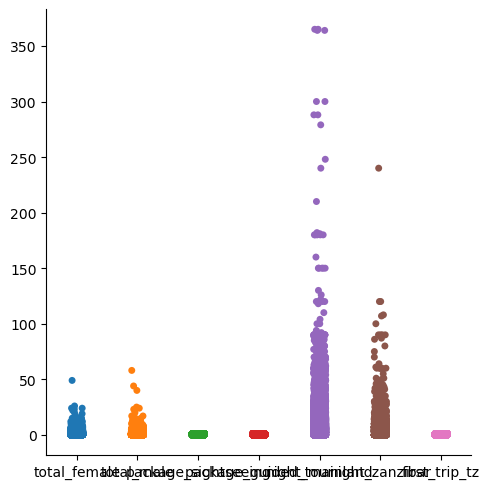

In [26]:
sns.catplot(dfTrain)